深度学习：一类通过**多层非线性**变换对高复杂性数据建模算法的合集。

深层神经网络实际上有组合特征提取的功能，对于解决不易提取特征向量的问题有很大帮助。

### 线性模型
- 只通过线性变换，任意层的全连接神经网络和单层神经网络模型的表达能力没有任何区别。
- 线性模型能够解决的问题是有限的。
- 如果将每一个神经元的输出通过一个非线性函数（激活函数），那么整个神经网络的模型也就不再是线性的了。

如下图，加入激活函数和偏置项之后的神经元结构
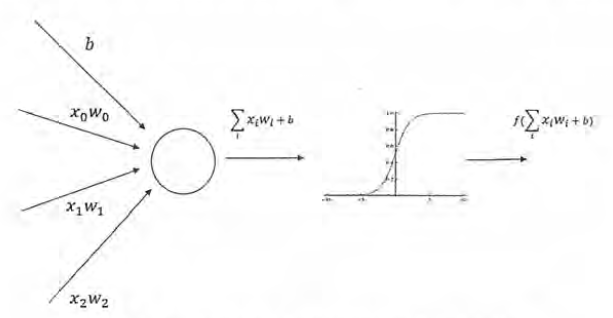
其数学定义为：
$$A_1=[a_{11},a_{12},a_{13}]=f(xW^{(1)}+b)=f([x_1,x_2]\begin{bmatrix}
W_{1,1}^{(1)} & W_{1,2}^{(1)} & W_{1,3}^{(1)}\\ 
W_{2,1}^{(1)} & W_{2,2}^{(1)} & W_{2,3}^{1}
\end{bmatrix}+[b_1,b_2,b_3])$$

常用的非线性激活函数如下：
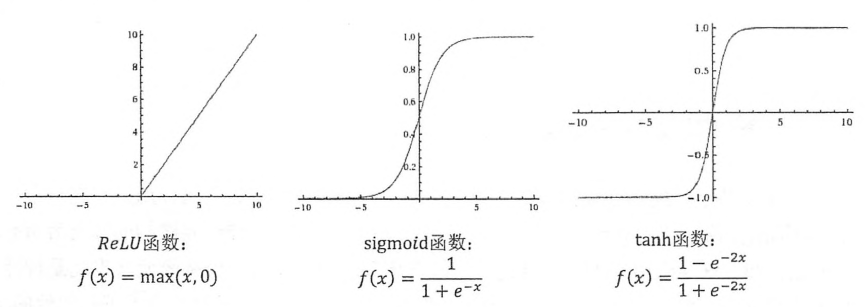

TensorFlow提供的激活函数：
- `tf.nn.relu`
- `tf.sigmoid`
- `tf.tanh`

### 损失函数
通过神经网络解决多分类问题的方法：设置$n$个输出节点，其中$n$为类别的个数。对于每一个样例，神经网络可得到一个$n$维数组作为输出结果，数组中的每一个维度对应一个类别。

输出向量和期望向量的评估：交叉熵（cross entropy）。

给定两个概率分布p和q，通过q来表述p的交叉熵为：
$$H(p,q)=\sum_xp(x)log q(x)$$
其中，p代表的是正确答案，q代表的是预测值。

交叉熵刻画的是两个概率分布之间的距离，交叉熵值越小，两个概率分布越接近。而神经网络的输出却不一定是一个概率分布。此时，通过Softmax回归将结果变成概率分布。

在TensorFlow中，Softmax只是一层额外的处理层，将神经网络的输出变成一个概率分布。

假设神经网络原输出为$y_1,y_2,\cdots,y_n$，经过Softmax回归处理之后的输出为：
$$softmax(y)_i=y_i'=\frac{e^{yi}}{\sum_{j=1}^ne^{yj}}$$
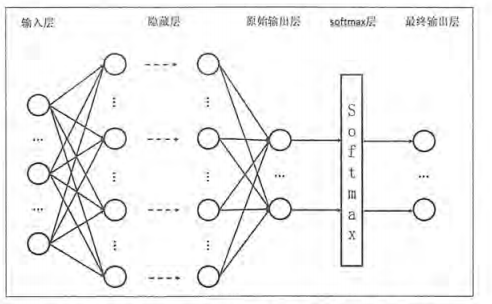

In [58]:
from math import *
log10(0.5)

-0.3010299956639812

In [59]:
import tensorflow as tf

v = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

with tf.Session() as sess:
    # tf.clip_by_value函数将张量中的数值限制在一个范围之内
    # 小于2.5的数都被换成2.5，大于4.5的数都被换成4.5
    print(tf.clip_by_value(v, 2.5, 4.5).eval())
    # 对张量中所有元素依次求对数
    print(tf.log(v).eval())

[[2.5 2.5 3. ]
 [4.  4.5 4.5]]
[[0.        0.6931472 1.0986123]
 [1.3862944 1.609438  1.7917595]]


In [60]:
v1 = tf.constant([[1.0, 2.0], [3.0, 4.0]])
v2 = tf.constant([[5.0, 6.0], [7.0, 8.0]])

with tf.Session() as sess:
    # 矩阵对应元素相乘
    print((v1 * v2).eval())
    # 矩阵乘法
    print(tf.matmul(v1, v2).eval())
    print(tf.reduce_mean(v1).eval())

[[ 5. 12.]
 [21. 32.]]
[[19. 22.]
 [43. 50.]]
2.5


- 解决回归问题的神经网络一般只有一个输出节点，这个节点的输出值就是预测值。
- 常用的损失函数为均方误差：
$$MSE=(y,y')=\frac{\sum_{i=1}^n(y_i-y_i')^2}{n}$$

In [61]:
y = tf.constant([[1.0, 2.0], [3.0, 4.0]])  # 神经网络输出的答案
y_ = tf.constant([[5.0, 6.0], [7.0, 8.0]])  # 标准答案

with tf.Session() as sess:
    # 求均方误差
    print(tf.reduce_mean(tf.square(y_ - y)).eval())
    
    # 交叉熵
    cross_entropy = -tf.reduce_mean(y_ * tf.clip_by_value(y, 1e-10, 1))
    print(cross_entropy.eval())

16.0
-6.5


### 自定义损失函数

如预测商品销量时，如果预测多了，商家损失的是生成商品的成本；而如果预测少了，损失的则是商品的利润。因为一般商品成本和利润不会严格相等，所以用上述的均方误差损失函数就不能够很好地最大化销售利润。比如，一个商品的成本是1元，但利润是10元。
$$Loss(y,y')=\sum_{i=1}^n f(y_i,y_i')$$
$$f(x,y)=\left\{\begin{matrix}
a(x-y),\ x>y\\ 
b(y-x),\ x\leq y
\end{matrix}\right.$$

对于不同的神经网络，不同的损失函数会对训练得到的模型产生重要影响。

In [62]:
v1 = tf.constant([1.0, 2.0, 3.0, 4.0])
v2 = tf.constant([4.0, 3.0, 2.0, 1.0])
# 比较两个张量中每一个元素的大小
print(tf.greater(v1, v2).eval())

# 第一个参数为选择条件根据，当为True时，会选择第二个参数中的值
# 在元素级别进行
print(tf.reduce_sum(tf.where(tf.greater(v1, v2), v1, v2)).eval())

[False False  True  True]
14.0


In [64]:
# 实现一个拥有两个输入节点，一个输出节点，没有隐藏层的神经网络
from numpy.random import RandomState

batch_size = 8

w1 = tf.Variable(tf.random_normal([2, 1], stddev=1, seed=1))

x = tf.placeholder(tf.float32, shape=(None, 2), name='x-input')
y_ = tf.placeholder(tf.float32, shape=(None, 1), name='y-input')

y = tf.matmul(x, w1)

# 定义损失函数和反向传播的算法
loss_less = 10
loss_more = 1
loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * loss_more, (y_ - y) * loss_less))
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)  # 学习率为0.001

# 通过随机数生成一个模拟数据集
rdm = RandomState(1)
dataset_size = 128
X = rdm.rand(dataset_size, 2)
Y = [[x1 + x2 + rdm.rand()/10.0 - 0.05] for (x1, x2) in X]

# 创建会话
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run(w1))
    
    STEPS = 5000  # 训练的轮数
    for i in range(STEPS):
        # 每次选取batch_size个样本进行训练
        start = (i * batch_size) % dataset_size
        end = min(start+batch_size, dataset_size)
        # 根据样本训练神经网络并更新参数
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        
        if i % 1000 == 0:
            # 每个一定轮数，计算在所有数据上的交叉熵
            total_cross_entropy = sess.run(cross_entropy, feed_dict={x: X, y_: Y})
            print("After %d training step(s), cross entropy on all data is %g" % (i, total_cross_entropy))
            
    print(sess.run(w1))

[[-0.8113182]
 [ 1.4845988]]
After 0 training step(s), cross entropy on all data is -6.5
After 1000 training step(s), cross entropy on all data is -6.5
After 2000 training step(s), cross entropy on all data is -6.5
After 3000 training step(s), cross entropy on all data is -6.5
After 4000 training step(s), cross entropy on all data is -6.5
[[1.019347 ]
 [1.0428089]]


### 神经网络的优化

神经网络的优化过程：
- 先通过前向传播算法计算得到预测值，并将预测值与真实值做对比得出两者之间的差距。
- 通过反向传播算法计算损失函数对每一个参数的梯度，再根据梯度和学习率使用梯度下降算法更新每一个参数。

梯度下降算法注意点：
- 梯度下降算法不能保证被优化的函数达到全局最优解。只有当损失函数为凸函数时，梯度下降算法才能保证达到全局最优解。
- 计算时间太长。因为在每一轮迭代中都需要计算在全部训练数据上的损失函数。为了加速训练过程，可使用随机梯度下降算法。

随机梯度下降算法注意点：
- 在每一轮迭代中，随机优化某一条训练数据上的损失函数。
- 在某一条数据上损失函数更小并不代表在全部数据上损失函数更小。因此，甚至可能无法达到局部最优。

折中方法：
- 每次计算一小部分训练数据的损失函数。

如何设置学习率？

学习率决定了参数更新的幅度。如果幅度过大，那么可能导致参数在极优值的两侧来回移动。当学习率过小时，虽然能保证收敛性，但是会大大降低优化速度。

- 指数衰减法：`tf.train.exponential_decay`

先使用较大的学习率来快速得到一个比较优的解，然后随着迭代的继续逐步减小学习率，使得模型在训练后期更加稳定。

In [63]:
global_step = tf.Variable(0)
# 初始学习率为0.1，每训练100轮后学习率乘以0.96
learning_rate = tf.train.exponential_decay(0.1, global_step, 100, 0.96, staircase=True)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss, global_step=global_step)

过拟合问题？

指当一个模型过为复杂之后，它可以很好地“记忆”每一个训练数据中随机噪音的部分而忘记了要去“学习”训练数据中通用的趋势。

正则化（regularization）：在损失函数中加入刻画模型复杂程度的指标，即优化$J(\theta)+\lambda R(w)$。一般而言，模型复杂度只由权重$w$决定。
- L1正则化：$R(w)=||w||_1=\sum_i|w_i|$，`tf.contrib.layers.l1_regularizer`
- L2正则化：$R(w)=||w||_2^2=\sum_i|w_i^2|$，`tf.contrib.layers.l2_regularizer`

In [65]:
w = tf.Variable(tf.random_normal([2, 1], stddev=1, seed=1))
y = tf.matmul(x, w)

# 第一部分为：均方误差损失函数
# 第二部分为：正则化。0.5为正则化项的权重，w为需要正则化损失的参数
loss = tf.reduce_mean(tf.square(y_ - y)) + tf.contrib.layers.l1_regularizer(0.5)(w)

In [66]:
weights = tf.constant([[1.0, -2.0], [-3.0, 4.0]])

print(tf.contrib.layers.l1_regularizer(0.5)(weights).eval())
print(tf.contrib.layers.l2_regularizer(0.5)(weights).eval())

5.0
7.5


In [67]:
# 获取一层神经网络边上的权重，并将L2正则化损失加入集合losses中
def get_weight(shape, lam):
    var = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(lam)(var))
    return var

x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))
batch_size = 8
layer_dimension = [2, 10, 10, 10, 1]  # 定义每一层网络中节点的个数
n_layers = len(layer_dimension)  # 神经网络的层数

cur_layer = x  # 维护前向传播时最深层的节点，开始时为输入层
in_dimension = layer_dimension[0]  # 当前层节点个数

# 通过循环生成一个5层全连接的神经网络结构
for i in range(1, n_layers):
    out_dimension = layer_dimension[i]  # 下一层节点个数
    weight = get_weight([in_dimension, out_dimension], 0.001)
    bias = tf.Variable(tf.constant(0.1, shape=[out_dimension]))
    cur_layer = tf.nn.relu(tf.matmul(cur_layer, weight) + bias)  # 使用relu激活函数
    in_dimension = layer_dimension[i]
    
# 模型在训练集上表现的均方误差损失函数，并加入集合losses中
mse_loss = tf.reduce_mean(tf.square(y_ - cur_layer))
tf.add_to_collection('losses', mse_loss)

# 返回集合中的所有元素，得到最终的损失函数
loss = tf.add_n(tf.get_collection('losses'))